## find shifts in 1st order diffraction limit image

In [1]:
# import tools
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from scipy.optimize import curve_fit
import copy
%matplotlib inline
import sys
sys.path.append("/u/home/a/alejandr/bin")
sys.path.append("/u/home/x/xiyuyi/bin")
sys.path.append("G:\\DH_localization\\PyPRIS")
sys.path.append("C:\\Users\\china\\Desktop\\Research\\PyPRIS")
sys.path.append("/Users/xiyuyi/Desktop/PyPRIS")
from PyPRIS import *
import os
import warnings

### generate observation of 1st order diffraction limit, from 0th order recovery results

In [35]:
%load_ext autoreload
%autoreload 2
objpath_CS = "/Users/xiyuyi/Desktop/PyPRIS_CL_Crimson_top50/bgSCF8_mu1.0e+02_alpha1.0e-09_thres-11zrange-5to5/saved_objects/"
objname_CS = "PyPRIS_bgSCF8_mu1.0e+02_alpha1.0e-09_thres-11zrange-5to5_pris7_10000.file"
pris_CS = "PyPRIS_pris7.file";
psf_CS_path = "/Users/xiyuyi/Desktop/PyPRIS/test_dataset_6/PSF_Crimson_Order1.tif"
blur_CS_path = "/Users/xiyuyi/Desktop/PyPRIS/test_dataset_6/Cali_3D_Crimson (3) single slice_dif1.tif"
blur0_CS_path = "/Users/xiyuyi/Desktop/PyPRIS/test_dataset_6/Cali_3D_Crimson (3) single slice_dif0CL.tif"

objpath_DR = "/Users/xiyuyi/Desktop/PyPRIS_CL_Darkred_top50/bgSCF8_mu1.0e+02_alpha1.0e-09_thres-11zrange-5to5/saved_objects"
objname_DR = "PyPRIS_bgSCF8_mu1.0e+02_alpha1.0e-09_thres-11zrange-5to5_pris4_10000.file"
pris_DR = "PyPRIS_pris4.file";
psf_DR_path = "/Users/xiyuyi/Desktop/PyPRIS/test_dataset_6/PSF_Darkred_Order1.tif"
blur_DR_path = "/Users/xiyuyi/Desktop/PyPRIS/test_dataset_6/Cali_3D_Darkred  (5) single slice_dif1.tif"
blur0_DR_path = "/Users/xiyuyi/Desktop/PyPRIS/test_dataset_6/Cali_3D_Darkred  (5) single slice_dif0CL.tif"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
### Crimson:

### load object
with open('{}/{}'.format(objpath_CS, objname_CS), "rb") as f:
    lb_CS = pickle.load(f) #the loaded object is a LinBreg object
    
with open('{}/{}'.format(objpath_CS, pris_CS), "rb") as f:
    pypris_CS = pickle.load(f) #the loaded object is a LinBreg object
    
### generate sensing matrix
## load psf and blur for diff1
psf_CS = io.imread(psf_CS_path)
blur_CS = io.imread(blur_CS_path)
blur0_CS = io.imread(blur0_CS_path)

# change the observer, 
observer = ObserveStation()
observer.observe_with_shift_prep(psf = psf_CS, 
                                 single_image_size = blur_CS.shape, 
                                 psfz0 = 101,
                                 shift_1 = 0.5, 
                                 shift_2 = 0,
                                 observer_debugger = False, 
                                 observer_edge_padding = False)
# generate sensing matrix
pypris_CS.observe = observer.observe_with_shift
pypris_CS.generate_sensing_mx()

### generate dif1 observation
dif1_simu = np.dot(pypris_CS.current_A, lb_CS.x)

### adjust shifts for the sensing matrix generation

### calculate the difference of the generated dif1 obs and the actual dif1 obs, until match
### settle with the shifts for dif1


----------- Generate sensing matrix:
            Matrix size: 29680  observation pixels 
                         2000  candidates 


Text(0.5,1,'dif1_simu - dif0CL')

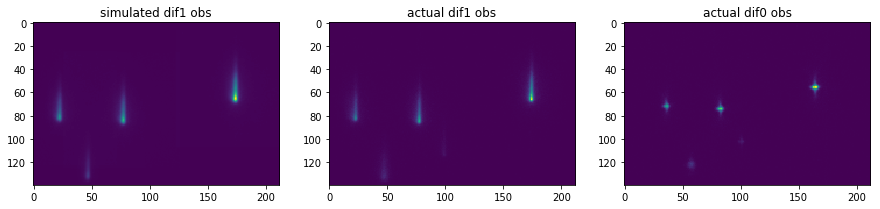

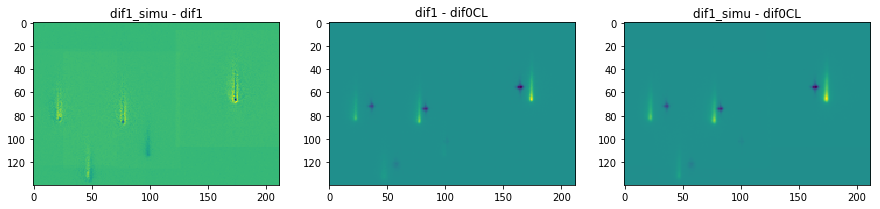

In [28]:
dif1_simu = dif1_simu.reshape(blur_CS.shape) - np.min(dif1_simu.ravel())
dif1_simu = dif1_simu/np.max(dif1_simu.ravel())

blur_CS = blur_CS - np.min(blur_CS.ravel())
blur_CS = blur_CS/np.max(blur_CS.ravel())

blur0_CS = blur0_CS - np.min(blur0_CS.ravel())
blur0_CS = blur0_CS/np.max(blur0_CS.ravel())

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(dif1_simu); plt.title('simulated dif1 obs')
plt.subplot(132)
plt.imshow(blur_CS); plt.title('actual dif1 obs')
plt.subplot(133)
plt.imshow(blur0_CS); plt.title('actual dif0 obs')


plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(dif1_simu - blur_CS*1.2); plt.title('dif1_simu - dif1')
plt.subplot(132)
plt.imshow(blur_CS - blur0_CS); plt.title('dif1 - dif0CL')
plt.subplot(133)
plt.imshow(dif1_simu - blur0_CS); plt.title('dif1_simu - dif0CL')



In [62]:
### Darkred:

### load object
with open('{}/{}'.format(objpath_DR, objname_DR), "rb") as f:
    lb_DR = pickle.load(f) #the loaded object is a LinBreg object
    
with open('{}/{}'.format(objpath_DR, pris_DR), "rb") as f:
    pypris_DR = pickle.load(f) #the loaded object is a LinBreg object
    
### generate sensing matrix
## load psf and blur for diff1
psf_DR = io.imread(psf_DR_path)
blur_DR = io.imread(blur_DR_path)
blur0_DR = io.imread(blur0_DR_path)

# change the observer, 
observer = ObserveStation()
observer.observe_with_shift_prep(psf = psf_DR, 
                                 single_image_size = blur_DR.shape, 
                                 psfz0 = 101,
                                 shift_1 = 2, 
                                 shift_2 = 0.2,
                                 observer_debugger = False, 
                                 observer_edge_padding = False)
# generate sensing matrix
pypris_DR.observe = observer.observe_with_shift
pypris_DR.generate_sensing_mx()

### generate dif1 observation
dif1_simu = np.dot(pypris_DR.current_A, lb_DR.x)

### adjust shifts for the sensing matrix generation

### calculate the difference of the generated dif1 obs and the actual dif1 obs, until match
### settle with the shifts for dif1


----------- Generate sensing matrix:
            Matrix size: 29680  observation pixels 
                         2000  candidates 


Text(0.5,1,'dif1_simu - dif0CL')

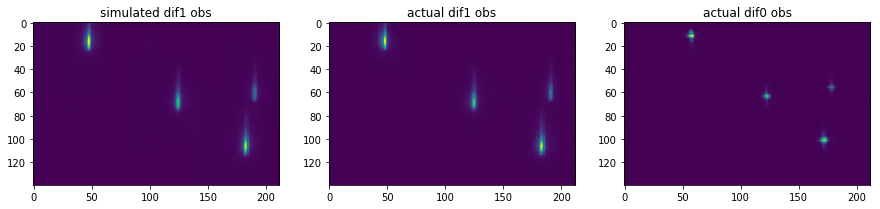

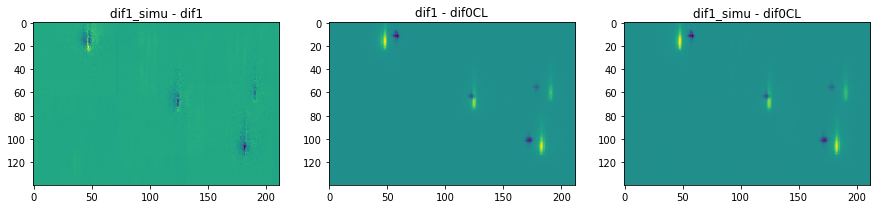

In [63]:
dif1_simu = dif1_simu.reshape(blur_DR.shape) - np.min(dif1_simu.ravel())
dif1_simu = dif1_simu/np.max(dif1_simu.ravel())

blur_DR = blur_DR - np.min(blur_DR.ravel())
blur_DR = blur_DR/np.max(blur_DR.ravel())

blur0_DR = blur0_DR - np.min(blur0_DR.ravel())
blur0_DR = blur0_DR/np.max(blur0_DR.ravel())

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(dif1_simu); plt.title('simulated dif1 obs')
plt.subplot(132)
plt.imshow(blur_DR); plt.title('actual dif1 obs')
plt.subplot(133)
plt.imshow(blur0_DR); plt.title('actual dif0 obs')


plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(dif1_simu - blur_DR*1.1); plt.title('dif1_simu - dif1')
plt.subplot(132)
plt.imshow(blur_DR - blur0_DR); plt.title('dif1 - dif0CL')
plt.subplot(133)
plt.imshow(dif1_simu - blur0_DR); plt.title('dif1_simu - dif0CL')

